In [6]:
"""\
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 --version

Python 3.10.12


In [1]:
# Import standard libraries
import os

# Third-Party Libraries
import numpy as np
import matplotlib.pyplot as plt

# Animation tools
from IPython.display import HTML
from matplotlib.animation import PillowWriter

# Import the Swarm Systems Lab Simulator
from ssl_simulator import createDir, load_data
from ssl_simulator.visualization import set_paper_parameters
set_paper_parameters(fontsize=15)

# Import custom functions and classes
from visualization import PlotGvfIkConsExp, AnimationGvfIkConsExp

# -------------------------------------------------------------------------------------

# Data and output directories
DATA_PATH = os.path.join("..", "data")
OUTPUT_PATH = os.path.join("..", "output")

createDir(OUTPUT_PATH)

The directory '../output' already exists!


## Read the logs

In [2]:
# Loading data
t0, tf = 1420, None
filename = "25_02_25__11_00_55_5.csv"
#filename = "25_02_25__11_00_55_6.csv"

data = load_data(os.path.join(DATA_PATH, filename), t0, tf)

# Procressing the data
data_time = np.array(data["Time"].to_list())
data_x = np.array(data["NAVIGATION:pos_x"].to_list())
data_y = np.array(data["NAVIGATION:pos_y"].to_list())
data_phi = np.array(data["GVF:error"].to_list())
data_omega_d = np.array(data["GVF:omega_d"].to_list())
data_omega = np.array(data["GVF:omega"].to_list())
data_n_norm = np.array(data["GVF:n_norm"].to_list())
data_t_norm = np.array(data["GVF:t_norm"].to_list())
data_ke = np.array(data["GVF:ke"].to_list())

print(data.columns)

Index(['Time', 'UTC', 'GPS_lat(deg)', 'GPS_long(deg)',
       'GVF_IK_CONS:x_avg_dot_d', 'GVF_IK_CONS:x_avg', 'GVF_IK_CONS:error',
       'GVF_IK:gamma_omega', 'GVF_IK:gamma_A', 'GVF_IK:gamma_dot',
       'GVF_IK:gamma', 'GVF_IK:error', 'GVF:omega', 'GVF:omega_d',
       'GVF:t_norm', 'GVF:n_norm', 'GVF:error_n', 'GVF:ke', 'GVF:s',
       'GVF:error', 'NAVIGATION:flight_time', 'NAVIGATION:dist_home',
       'NAVIGATION:pos_y', 'NAVIGATION:pos_x', 'NAVIGATION:cur_block',
       'GPS:speed', 'GPS:alt', 'GPS:course', 'GPS:utm_north', 'GPS:utm_east',
       'ATTITUDE:theta', 'ATTITUDE:psi', 'ATTITUDE:phi'],
      dtype='object')


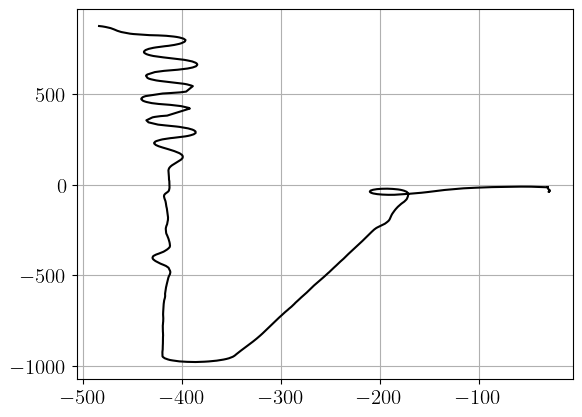

In [4]:
plt.plot(data_x, data_y, "-k", markersize=2)
plt.grid(True)

## Generate the article plots

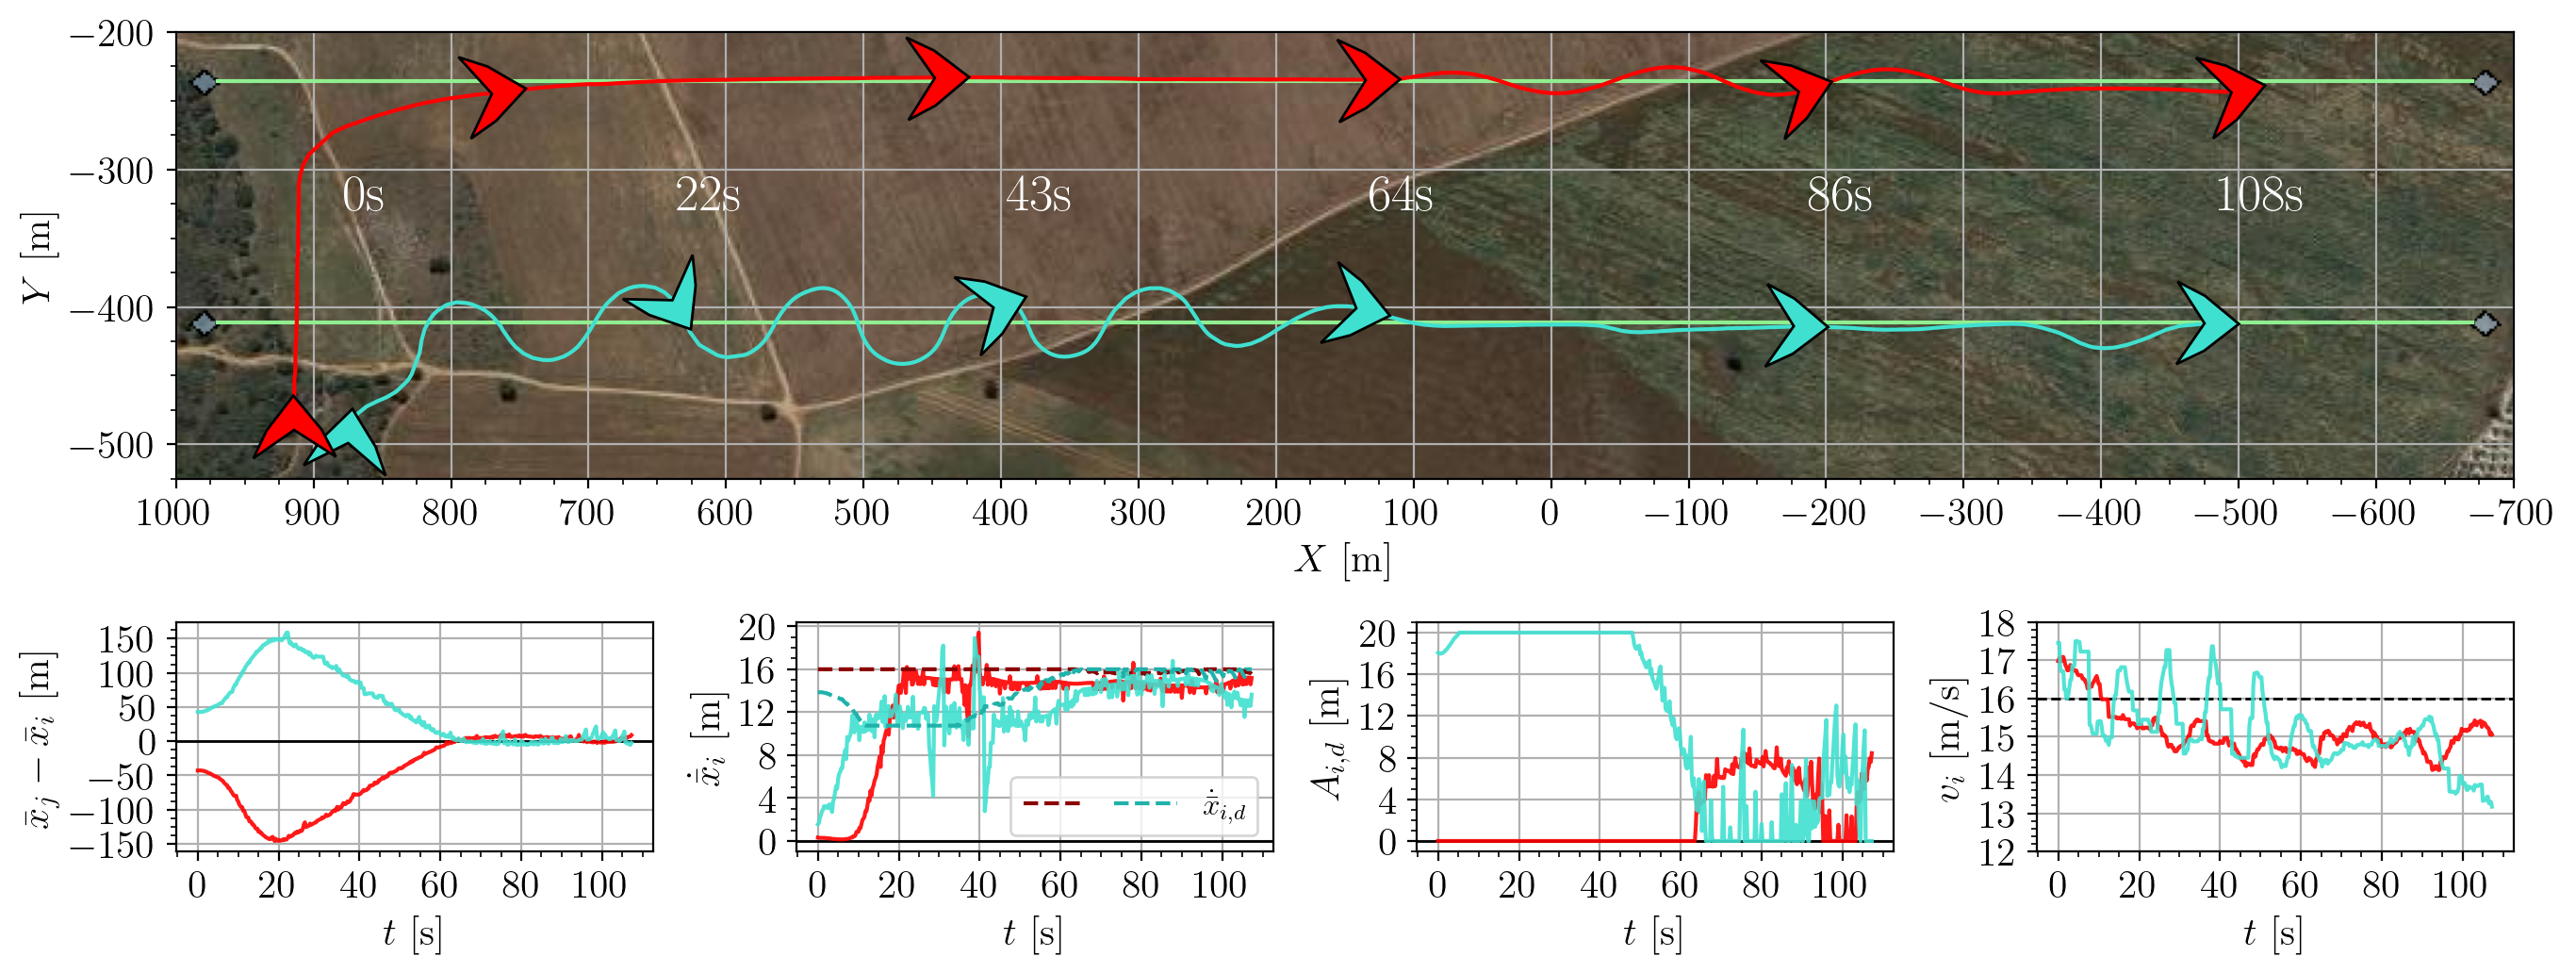

In [3]:
# Loading data
t0, tf = 937, 1500
t0, tf = 1420, 1600

filename1 = "25_02_25__11_00_55_5.csv"
filename2 = "25_02_25__11_00_55_6.csv"

data1 = load_data(os.path.join(DATA_PATH, filename1), t0, tf)
data2 = load_data(os.path.join(DATA_PATH, filename2), t0, tf)

gps_img = plt.imread(os.path.join(DATA_PATH, "exp_cons_rot.png"))

exp = PlotGvfIkConsExp(data1, data2)
exp.plot(gps_img, xlim=[-525,-200], ylim=[-700,1000], dpi=200, figsize=(16,6), 
         idx_list=np.linspace(0, 430, 6, dtype=int), idx_filt=[100,200])

plt.show()

## Generate the animation

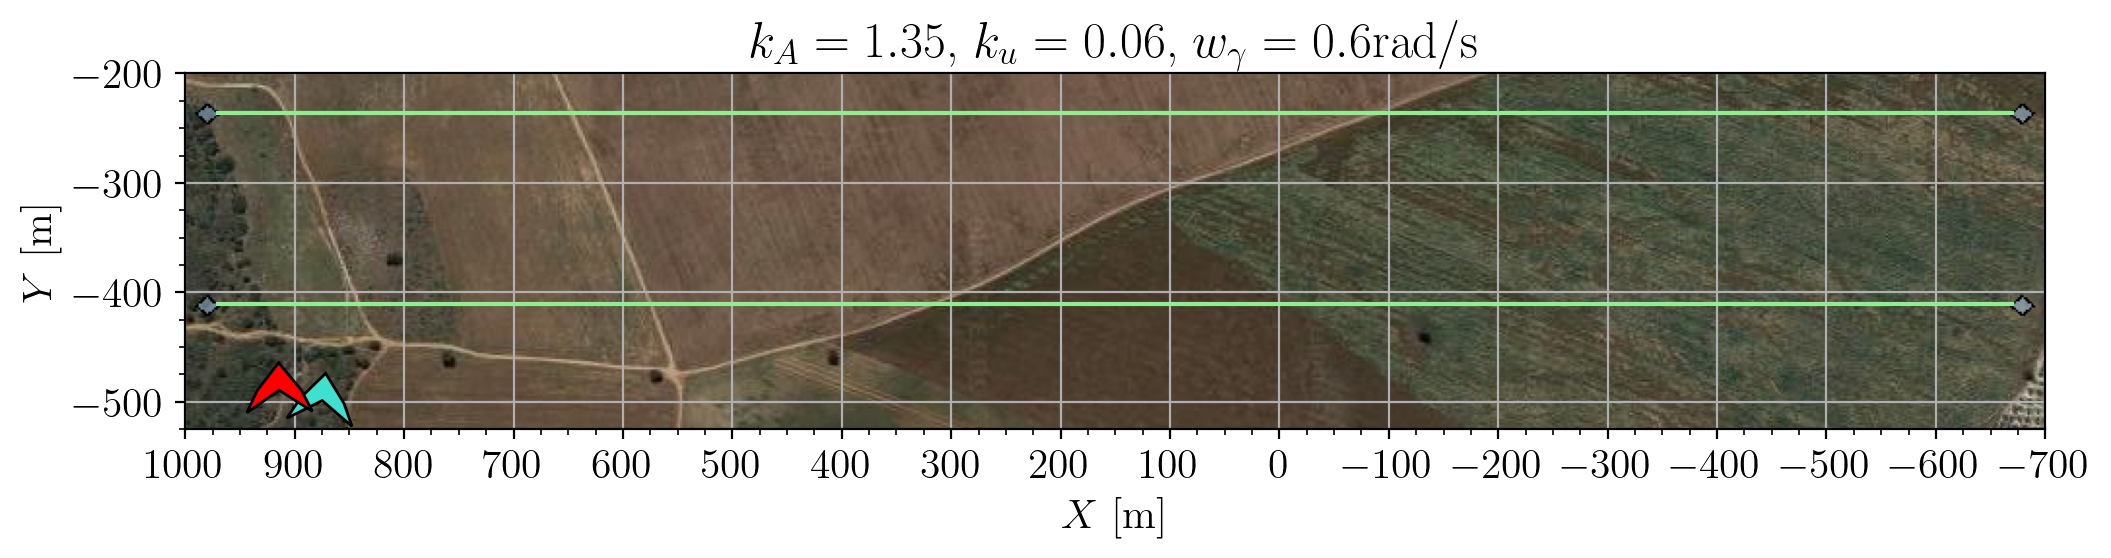

Simulating 468 (428) frames... 
Progress:


100%|██████████| 468/468 [01:29<00:00,  4.38it/s]

In [2]:
# Loading data
t0, tf = 1420, 1527
# t0, tf = 1420, 1421

filename1 = "25_02_25__11_00_55_5.csv"
filename2 = "25_02_25__11_00_55_6.csv"

data1 = load_data(os.path.join(DATA_PATH, filename1), t0, tf)
data2 = load_data(os.path.join(DATA_PATH, filename2), t0, tf)

gps_img = plt.imread(os.path.join(DATA_PATH, "exp_cons_rot.png"))

animator = AnimationGvfIkConsExp(
    data1, data2, gps_img=gps_img, idx_filt=[100,200],
    dpi=200, figsize=(12,3), debug=False,
    xlim=[-525,-200], ylim=[-700,1000])

anim = animator.gen_animation(fps=40, wait_period=1)
HTML(anim.to_html5_video()) # It takes a loooot of time...